<a href="https://colab.research.google.com/github/JaySanthanam/Programming-for-data/blob/main/Worksheets/7_1_Visualisation_with_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Describing data visually
---

There are a good number of libraries available containing functions for visualising data with bar charts, pie charts, line plots, box plots, scatter plots and, in some libraries, with more image based visualisations.

To keep it relatively simple, we will use **matplotlib**, a widely used library with a wide range of visualisation functions for data sets and mathematical equations.  It has the main functions we will use in this course:
*  bar charts
*  pie charts
*  line plots
*  box plots
*  scatter plots
*  histogram

Each requires these things:  
1. Select the data columns to be plotted 
2. Prepare the data (remove null values, clean formats, etc)  
3. Run the function for the required plot

Once you have the hang of these, you can start to look at labelling, colouring, etc.

In order to begin creating visualisations, you need to:  
* import **matplotlib** as **plt**

Test output for Exercises 1 to 7 is in this [image](https://drive.google.com/file/d/1LYxLJyur_zgzvJcv_C1WGm21nf07ddY6/view?usp=sharing)

# IMPORTANT
---
There has been an upgrade to a library needed for reading Excel files in a notebook.  To ensure that you have this upgrade, run the code in the cell below and then select 'Restart runtime' from the Runtime menu.

In [1]:
!pip install --upgrade openpyxl

     |████████████████████████████████| 242 kB 21.9 MB/s 
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 2.5.9
    Uninstalling openpyxl-2.5.9:
      Successfully uninstalled openpyxl-2.5.9


#  Bar charts and Line Plots
---

For these exercises, use the Excel data file:

'public-use-talent-migration' looking at sheet_name 'Country Migration'  
https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/public_use-talent-migration.xlsx?raw=true 

**Example**:  

Watch the video [here](https://drive.google.com/file/d/1eNOy7fhkB2CSfVdb66kqB66qXfoPfOpd/view?usp=sharing) - demonstration of creating a bar chart using the `matplotlib` library `pyplot`.  Then have a go at creating it yourself.

In [5]:
import pandas as pd
from google.colab import files
import io

def get_data(url):
  df = pd.read_excel(url,sheet_name="Country Migration")
  return df

url = "https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/public_use-talent-migration.xlsx?raw=true"
data = get_data(url)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4148 entries, 0 to 4147
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   base_country_code         4148 non-null   object 
 1   base_country_name         4148 non-null   object 
 2   base_lat                  4148 non-null   float64
 3   base_long                 4148 non-null   float64
 4   base_country_wb_income    4148 non-null   object 
 5   base_country_wb_region    4148 non-null   object 
 6   target_country_code       4148 non-null   object 
 7   target_country_name       4148 non-null   object 
 8   target_lat                4148 non-null   float64
 9   target_long               4148 non-null   float64
 10  target_country_wb_income  4148 non-null   object 
 11  target_country_wb_region  4148 non-null   object 
 12  net_per_10K_2015          4148 non-null   float64
 13  net_per_10K_2016          4148 non-null   float64
 14  net_per_

### Exercise 1 - Line plot of net migration 
--- 

Creating a line plot of mean net migration over the years 2015 to 2019

* create a new dataframe containing only the five columns holding net migration
* create a new data variable to hold the means of the five columns
* create a labels variable to hold the keys (column headings) 
* use plt.plot(x, y) to plot your line chart

***Presentation tips:***   
Plot the chart, then add formatting, then show the plot   

Rotate the x-axis labels in the plot:  
`plt.xticks(rotation=45)`  

Show the grid:  
`plt.grid()`  

When all formatting has been done, show the plot:   
`plt.show()`

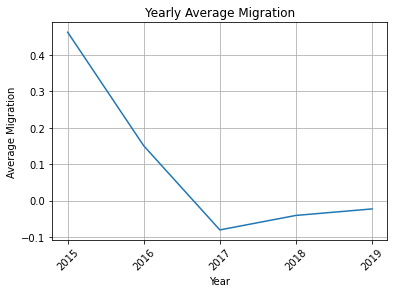

In [33]:
import matplotlib  
import matplotlib.pyplot as plt
import numpy as np

data = data.dropna(subset = ["net_per_10K_2015", "net_per_10K_2016","net_per_10K_2017", "net_per_10K_2018", "net_per_10K_2019"])
migration_df = data[["net_per_10K_2015", "net_per_10K_2016","net_per_10K_2017", "net_per_10K_2018", "net_per_10K_2019"]].copy()
migration_means = migration_df.mean()
yr = np.array([2015,2016,2017,2018,2019], dtype=int)
ave = np.array(migration_means)
plt.plot(yr, ave)
plt.xlabel("Year")
plt.ylabel("Average Migration")
plt.title("Yearly Average Migration")
plt.xticks(yr)
plt.xticks(rotation=45)
plt.grid()
plt.show()

### Exercise 2 - Creating a Bar chart for yearly migration
---
Create a bar chart which shows the total net migration for the years 2015-2019  
 
* split the migration columns into a new dataframe
* create a data variable from the max() of the five columns
* create a labels variable, this time just create a list of the 5 years ['2015','2016','2017','2018','2019']
* plot the bar chart

***Presentation tips***:
* use plt.xlabel('Year') and plt.ylabel('Total net migration') to name your axis 
* display your bar graph with plt.show 

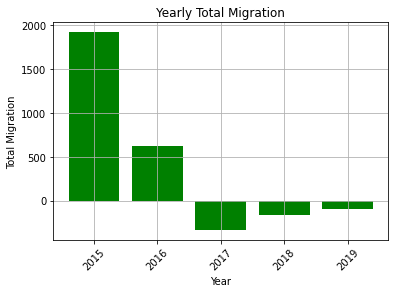

In [39]:
migration_tot = migration_df.sum()
yr_list = [2015,2016,2017,2018,2019]
net_mig = np.array(migration_tot)
plt.bar(yr_list, net_mig, color='green', align = 'center')
plt.xlabel("Year")
plt.ylabel("Total Migration")
plt.title("Yearly Total Migration")
plt.xticks(yr_list)
plt.xticks(rotation=45)
plt.grid()
plt.show()

### Exercise 3 - creating a bar graph using grouped data 
---

Create a horizontal bar chart of 2019 mean immigration for each income level ('`target_country_wb_income`')

* create a data variable which contains the means, grouped by '`target_country_wb_income`' 
* extract your labels (x) using the .keys() function 
* use the plt.barh(x, y) to create a horizontal bar graph 
* add labels to the axes ('Year', 'Net Migration')  
* show the plot  

Try using plt.bar(x,y) - can you see why horizontally is more appropriate?

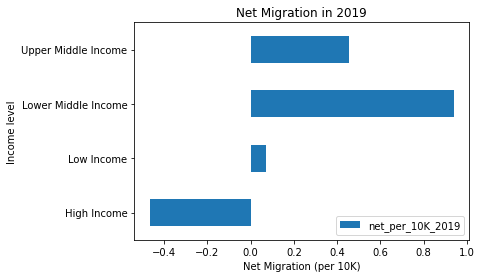

In [90]:
migration_v2_19 = data[["target_country_wb_income","net_per_10K_2019"]].copy()
migration_v2_grp1 = migration_v2_19.groupby(["target_country_wb_income"]).mean()
migration_v2_grp1.plot(kind='barh')
plt.xlabel("Net Migration (per 10K)")
plt.ylabel("Income level")
plt.title("Net Migration in 2019")
plt.show()

# Pie Charts, Box Plots, Scatter Plots and Histograms
---

For these exercises you will use the Psychology dataset: "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"

To get the data ready:

* read csv file above and save into a new variable called `psych_data`

### Exercise 4 - Creating a pie chart of stress data
---
Create a pie chart which shows how stressed students who speak different languages are.   

To do this:

* similar to Exercise 2 - create a variable which groups the means of data by firstlanguage  
* store the means for 'Stress' in a variable called data
* extract your labels using the keys() function
* plot your pie chart using plt.pie(data, labels = labels)
* write a comment noting anything interesting about the visualisation




### Exercise 5 - Creating a box plot of Wellbeing
---
A box plot is used to visualise summary infomation about a data series such as the min, max and median. 

Create a box plot of the Wellbeing scores

*  split off the wellbeing column  
*  use plt.boxplot(data, labels="Wellbeing") to create boxplot 
*  show the boxplot

### Exercise 6 - Histograms of  age 
---

Create a histogram which shows the frequency distribution for '`Wellbeing`'.

* split the `Wellbeing` column off to provide the data
* plot the histogram using `plt.hist(data)` 
* add labels using `plt.xlabel()` and `plt.ylabel()`
* change the colours of the bars - try plt.hist(x, color = 'red')
* show the plot


### Exercise 7 - Create a scatterplot of Wellbeing and Stress with line of best fit
---

Assuming that Stress is fairly closely associated with Wellbeing:

Create a scatterplot of Wellbeing and Stress data.

* create **x** from the `Stress` column
* create *y* from the `Wellbeing` column
* use `plt.scatter(x,y)` to create a scatterplot
* add x axis and y axis labels using `plt.xlabel('Stress')` and `plt.ylabel('Wellbeing')`
*  

Adding a line of best fit:   
* the code cell below already has the linregress function imported from the scipy.stats library
* create a regression variable and assign the result of using linregress (`regression = linregress(x,y)` )
* store the slope and intercept (`slope = regression.slope`, `intercept = regression.intercept`)
* plot a line using `plt.plot(x, slope*x + intercept)` 

Show the plots.

Write a short data story ( a description of the data.  What conclusion could be reached from the chart?  How confident could you be in this conclusion and why?




In [ ]:
from scipy.stats import linregress

### Exercise 8 - Create a set of charts from a data set
---
Use the student exam scores dataset here: https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/Data%20Sets%20for%20code%20divisio/student_scores.csv

Investigate the data and create a set of charts.  

Create each chart in a new code cell.

Add a text cell below each visualisation to explain what the chart is showing.


# Further reference on w3schools

[Matplotlib on w3schools](https://www.w3schools.com/python/matplotlib_intro.**asp**)